Importing Libraries

In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns


Prepare the Data

In [16]:
# Load the datasets
customers = pd.read_csv('/content/drive/MyDrive/Data Science assignment /Datasets/Customers.csv')
transactions = pd.read_csv('/content/drive/MyDrive/Data Science assignment /Datasets/Transactions.csv')

# Merge customers and transactions data
transactions_agg = transactions.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum',
    'TransactionID': 'count'
}).reset_index().rename(columns={'TransactionID': 'TransactionCount'})

# Merge aggregated transactions with customer profiles
customer_data = customers.merge(transactions_agg, on='CustomerID', how='left').fillna(0)

# Select features for clustering
features = customer_data[['TotalValue', 'Quantity', 'TransactionCount']]


Standardize the Features

In [17]:
# Standardize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


Perform K-Means Clustering

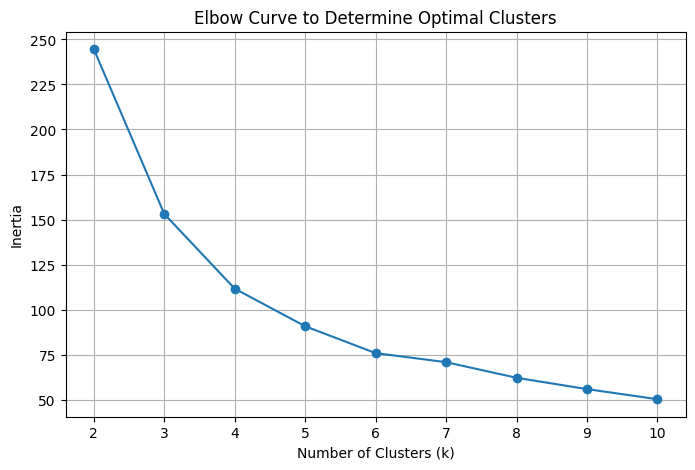

In [18]:
# Elbow method to find the optimal number of clusters
inertia = []
k_range = range(2, 11)  # Between 2 and 10 clusters
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Curve to Determine Optimal Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


Fit the K-Means Model

In [19]:
# Fit K-Means with the chosen number of clusters (e.g., 4)
optimal_k = 4  # Adjust this based on the Elbow Curve
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(scaled_features)


 Evaluate the Clustering

In [20]:
# Evaluate clustering
db_index = davies_bouldin_score(scaled_features, customer_data['Cluster'])
silhouette_avg = silhouette_score(scaled_features, customer_data['Cluster'])

print(f"Davies-Bouldin Index: {db_index:.2f}")
print(f"Silhouette Score: {silhouette_avg:.2f}")


Davies-Bouldin Index: 0.81
Silhouette Score: 0.39


Visualize the Clusters

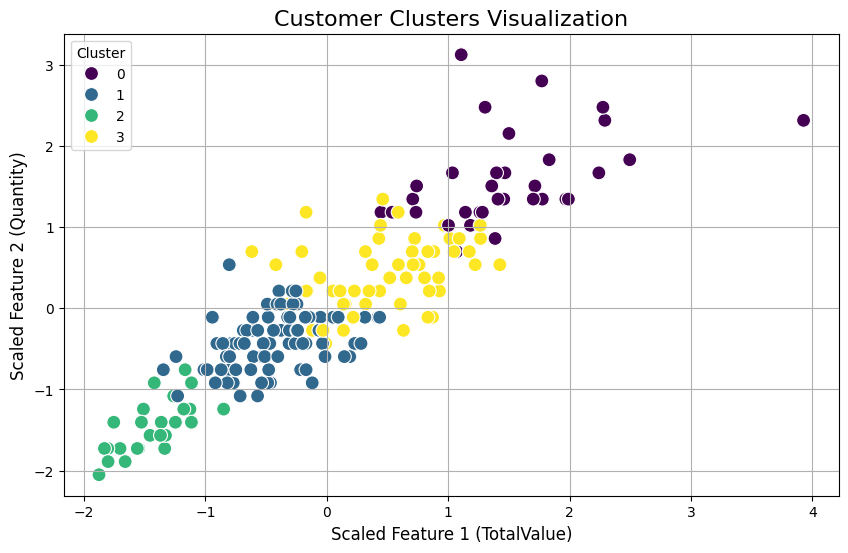

In [21]:
# Plot clusters based on two features
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=scaled_features[:, 0], y=scaled_features[:, 1],
    hue=customer_data['Cluster'], palette='viridis', s=100
)
plt.title('Customer Clusters Visualization', fontsize=16)
plt.xlabel('Scaled Feature 1 (TotalValue)', fontsize=12)
plt.ylabel('Scaled Feature 2 (Quantity)', fontsize=12)
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


Analyze and Save Results

In [23]:
# Save customer data with cluster labels
customer_data.to_csv('/content/drive/MyDrive/Data Science assignment /Python files/Chinmay_Khanapurkar_Clustering.csv', index=False)
print("Clustered data saved to Customer_Clusters.csv!")


Clustered data saved to Customer_Clusters.csv!
